**Description**: Analyze accuracies for $n = 500$.

**Estimated runtime**: ~45 min. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
from typing import Literal

import seaborn as sns

import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
num_test: Literal[100, 200, 500] = 500

In [2]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = "accuracies_from_paper"
accuracy_df = utils.load_all_accuracies(accuracies_home_dir, num_test)  # for plot
num_correct_df = utils.load_all_num_correct(accuracies_home_dir, num_test)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

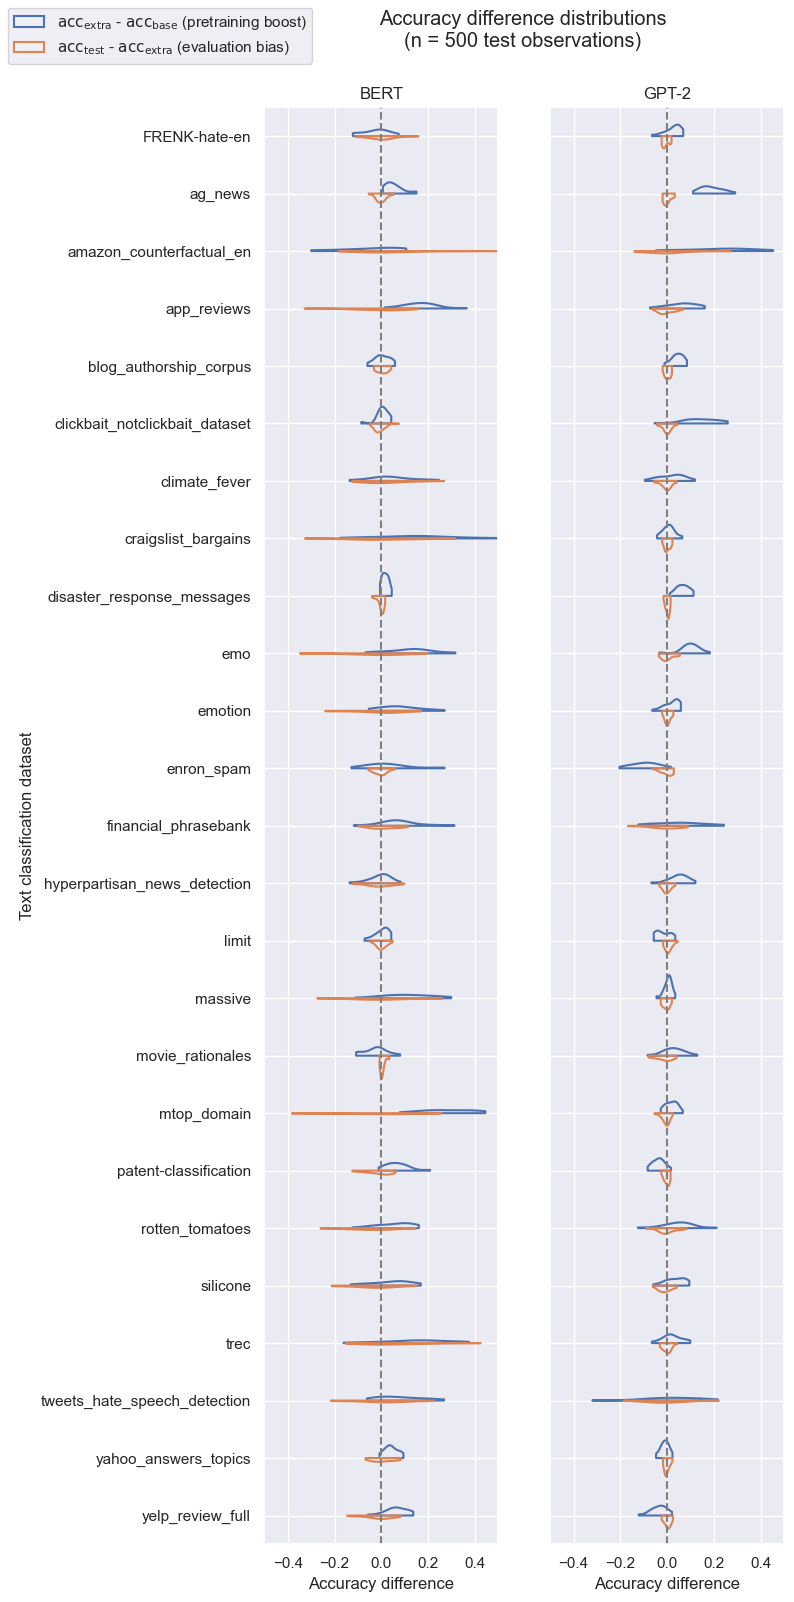

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.050082 ┆ 0.009035 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.211253 ┆ 0.046703 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.00015,0.008612
"""ag_news""",0.12035,0.012697
"""amazon_counter…",0.09565,0.029372
"""app_reviews""",0.11375,0.013589
"""blog_authorshi…",0.0234,0.005611
…,…,…
"""silicone""",0.039,0.010794
"""trec""",0.09185,0.020097
"""tweets_hate_sp…",0.04965,0.01783
"""yahoo_answers_…",0.0152,0.00569


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.005007,0.01526
"""ag_news""",0.241968,0.032177
"""amazon_counter…",0.299053,0.086785
"""app_reviews""",0.875088,0.099521
"""blog_authorshi…",0.049259,0.011196
…,…,…
"""silicone""",0.081492,0.020036
"""trec""",0.462132,0.099285
"""tweets_hate_sp…",0.087765,0.029099
"""yahoo_answers_…",0.154844,0.052494


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1045 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[extra],0.26298,0.00449,0.25626,0.27035,0.00005,0.00004,8177.04163,3297.33947,0.99983


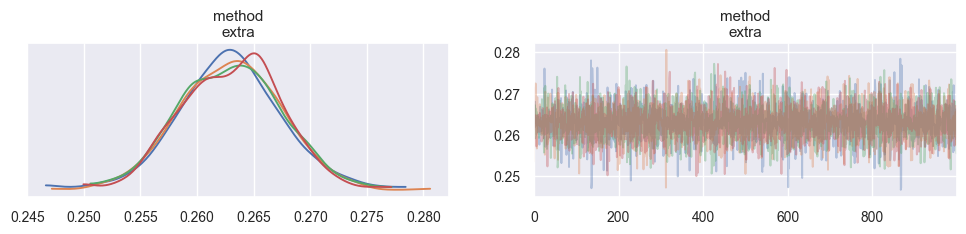

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.001834 ┆ 0.002254 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.021576 ┆ 0.011069 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.00085,0.007218
"""ag_news""",-0.0003,0.00303
"""amazon_counter…",0.0263,0.021317
"""app_reviews""",-0.0036,0.013024
"""blog_authorshi…",0.0028,0.002753
…,…,…
"""silicone""",-0.02005,0.010684
"""trec""",0.01755,0.015125
"""tweets_hate_sp…",0.00255,0.016002
"""yahoo_answers_…",0.0028,0.005162


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.001534,0.013578
"""ag_news""",-0.000011,0.003969
"""amazon_counter…",0.080184,0.052024
"""app_reviews""",0.021547,0.044594
"""blog_authorshi…",0.005176,0.005197
…,…,…
"""silicone""",-0.027684,0.016884
"""trec""",0.084645,0.058826
"""tweets_hate_sp…",0.016488,0.025341
"""yahoo_answers_…",0.038946,0.039188


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 967 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[test],-0.00963,0.00459,-0.01673,-0.00211,0.00006,0.00005,5703.99264,2777.00956,1.00023


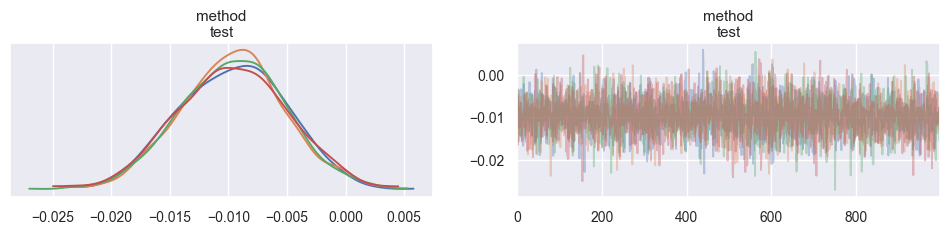

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


In [17]:
summary_control.to_netcdf(filename=f"main_{num_test}_control.nc")

'main_500_control.nc'

In [18]:
summary_bias.to_netcdf(filename=f"main_{num_test}_treatment.nc")

'main_500_treatment.nc'